In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test2 = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/rajratan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rajratan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rajratan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

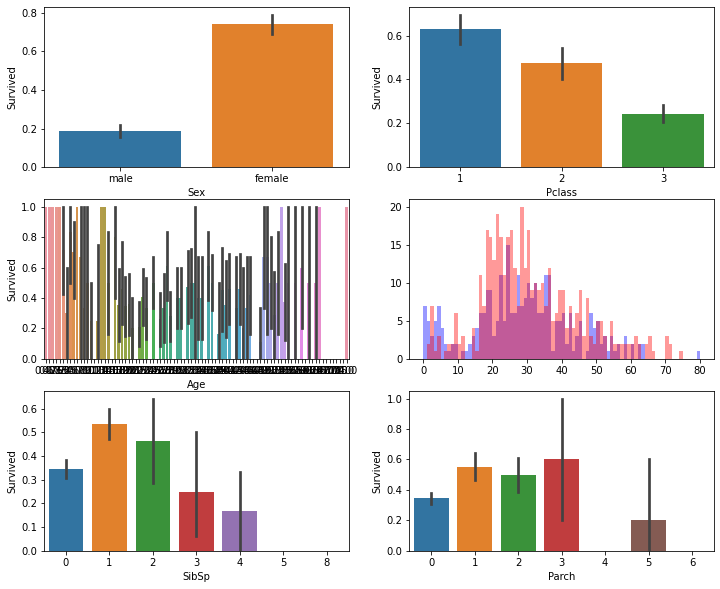

In [6]:
surv = train['Survived'] == 1
die = train['Survived'] == 0
plt.figure(figsize=[12,10])
plt.subplot(321)
sns.barplot('Sex','Survived',data = train)
plt.subplot(322)
sns.barplot('Pclass','Survived',data = train)
plt.subplot(323)
sns.barplot('Age','Survived',data = train)
plt.subplot(324)
sns.distplot(train[surv]['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(train[die]['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red')
plt.subplot(325)
sns.barplot('SibSp','Survived',data = train)
plt.subplot(326)
sns.barplot('Parch','Survived',data = train)

In [7]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


In [8]:
sex = np.zeros(len(train))
sex[train['Sex']== 'male'] = 1
sex[train['Sex']== 'female'] = 0
train['Sex'] = sex

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(train))
Embarked[train['Embarked']== 'C'] = 1
Embarked[train['Embarked']== 'Q'] = 2
Embarked[train['Embarked']== 'S'] = 3
train['Embarked'] = Embarked
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,3.0


In [10]:
print(type(train))
dropping = ['PassengerId','Name', 'Ticket','Cabin']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)
train.head()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,3.0
1,1,1,0.0,38.0,1,0,71.2833,1.0
2,1,3,0.0,26.0,0,0,7.9250,3.0
3,1,1,0.0,35.0,1,0,53.1000,3.0
4,0,3,1.0,35.0,0,0,8.0500,3.0


In [11]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
age = np.zeros(len(train))
age[train['Age']<20] = 1
age[(train['Age']>=20)&(train['Age']<60)] = 2
age[(train['Age']>=60)] = 3
train['Age'] = age
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,2.0,1,0,7.2500,3.0
1,1,1,0.0,2.0,1,0,71.2833,1.0
2,1,3,0.0,2.0,0,0,7.9250,3.0
3,1,1,0.0,2.0,1,0,53.1000,3.0
4,0,3,1.0,2.0,0,0,8.0500,3.0


In [12]:
from sklearn.model_selection import cross_val_score, KFold

train_y=train['Survived']
train_ft=train.drop('Survived',axis=1)
kf = KFold(n_splits=10,random_state=1)
print(train_ft.head())
print(train_y.head())

   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0       3  1.0  2.0      1      0   7.2500       3.0
1       1  0.0  2.0      1      0  71.2833       1.0
2       3  0.0  2.0      0      0   7.9250       3.0
3       1  0.0  2.0      1      0  53.1000       3.0
4       3  1.0  2.0      0      0   8.0500       3.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


/home/rajratan/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [13]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(C = 30, gamma = 0.01)
svc.fit(train_ft, train_y) 

acc_SVM = cross_val_score(svc,train_ft,train_y,cv=kf)
print(acc_SVM.mean())

0.7732833957553059


In [14]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
NN = NearestCentroid()
NN.fit(train_ft, train_y)
acc_NN = cross_val_score(NN,train_ft,train_y,cv=kf)
print(acc_NN.mean())

0.665692883895131


/home/rajratan/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
